### 월별 데이터 합산

In [1]:
from glob import glob

excel_files = glob('./datas/*.xlsx')

In [2]:
excel_files

['./datas\\01월 서울시 교통량 조사자료(2019).xlsx',
 './datas\\01월 서울시 교통량 조사자료(2020).xlsx',
 './datas\\01월 서울시 교통량 조사자료(2021).xlsx',
 './datas\\01월 서울시 교통량 조사자료(2022).xlsx',
 './datas\\01월 서울시 교통량 조사자료(2023).xlsx',
 './datas\\02월 서울시 교통량 조사자료(2019).xlsx',
 './datas\\02월 서울시 교통량 조사자료(2020).xlsx',
 './datas\\02월 서울시 교통량 조사자료(2021).xlsx',
 './datas\\02월 서울시 교통량 조사자료(2022).xlsx',
 './datas\\02월 서울시 교통량 조사자료(2023).xlsx',
 './datas\\03월 서울시 교통량 조사자료(2019).xlsx',
 './datas\\03월 서울시 교통량 조사자료(2020).xlsx',
 './datas\\03월 서울시 교통량 조사자료(2021).xlsx',
 './datas\\03월 서울시 교통량 조사자료(2022).xlsx',
 './datas\\03월 서울시 교통량 조사자료(2023).xlsx',
 './datas\\04월 서울시 교통량 조사자료(2019).xlsx',
 './datas\\04월 서울시 교통량 조사자료(2020).xlsx',
 './datas\\04월 서울시 교통량 조사자료(2021).xlsx',
 './datas\\04월 서울시 교통량 조사자료(2022).xlsx',
 './datas\\04월 서울시 교통량 조사자료(2023).xlsx',
 './datas\\05월 서울시 교통량 조사자료(2019).xlsx',
 './datas\\05월 서울시 교통량 조사자료(2020).xlsx',
 './datas\\05월 서울시 교통량 조사자료(2021).xlsx',
 './datas\\05월 서울시 교통량 조사자료(2022).xlsx',
 './datas\\05월 서

In [3]:
import pandas as pd
from tqdm.notebook import tqdm

total_traffic = pd.DataFrame()

for file in tqdm(excel_files):
    temp = pd.read_excel(file)
    total_traffic = pd.concat([total_traffic, temp])

total_traffic = total_traffic.reset_index(drop=True)

  0%|          | 0/60 [00:00<?, ?it/s]

In [4]:
total_traffic.head()

,일자,요일,지점명,지점번호,방향,구분,주소,0시,1시,2시,...,17시,18시,19시,20시,21시,22시,23시,Unnamed: 31,Unnamed: 32,요일(2)
0,20190101,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,서울시 서대문구 신촌동 1-142,NaN,693.0,479.0,...,1372.0,1184.0,1019.0,895.0,877.0,749.0,546.0,NaN,NaN,NaN
1,20190102,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,서울시 서대문구 신촌동 1-142,371.0,224.0,173.0,...,2080.0,1989.0,1513.0,1233.0,1223.0,1157.0,904.0,NaN,NaN,NaN
2,20190103,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,서울시 서대문구 신촌동 1-142,594.0,425.0,328.0,...,2212.0,2131.0,1666.0,1396.0,1352.0,1224.0,982.0,NaN,NaN,NaN
3,20190104,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,서울시 서대문구 신촌동 1-142,736.0,482.0,374.0,...,2237.0,2051.0,1794.0,1433.0,1354.0,1297.0,992.0,NaN,NaN,NaN
4,20190105,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,서울시 서대문구 신촌동 1-142,802.0,570.0,467.0,...,2080.0,1819.0,1303.0,1146.0,1146.0,1090.0,745.0,NaN,NaN,NaN


In [5]:
df = total_traffic.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498860 entries, 0 to 498859
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일자           498860 non-null  int64  
 1   요일           498860 non-null  object 
 2   지점명          498860 non-null  object 
 3   지점번호         498860 non-null  object 
 4   방향           498860 non-null  object 
 5   구분           498860 non-null  object 
 6   주소           496566 non-null  object 
 7   0시           441687 non-null  float64
 8   1시           441864 non-null  float64
 9   2시           442079 non-null  float64
 10  3시           441965 non-null  float64
 11  4시           442109 non-null  float64
 12  5시           442244 non-null  float64
 13  6시           442335 non-null  float64
 14  7시           442322 non-null  float64
 15  8시           442249 non-null  float64
 16  9시           442466 non-null  float64
 17  10시          442572 non-null  float64
 18  11시          442415 non-

In [8]:
# 컬럼 정리 및 에러 컬럼 삭제
df.drop(['지점명', '구분', 'Unnamed: 31', 'Unnamed: 32', '요일(2)'], axis=1, inplace=True)

엑셀 파일들을 한 개의 df로 합치면서 불필요한 colum이 생성됨 : 'Unnamed: 31', 'Unnamed: 32', '요일(2)'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498860 entries, 0 to 498859
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일자      498860 non-null  int64  
 1   요일      498860 non-null  object 
 2   지점번호    498860 non-null  object 
 3   방향      498860 non-null  object 
 4   주소      496566 non-null  object 
 5   0시      441687 non-null  float64
 6   1시      441864 non-null  float64
 7   2시      442079 non-null  float64
 8   3시      441965 non-null  float64
 9   4시      442109 non-null  float64
 10  5시      442244 non-null  float64
 11  6시      442335 non-null  float64
 12  7시      442322 non-null  float64
 13  8시      442249 non-null  float64
 14  9시      442466 non-null  float64
 15  10시     442572 non-null  float64
 16  11시     442415 non-null  float64
 17  12시     442340 non-null  float64
 18  13시     442280 non-null  float64
 19  14시     442588 non-null  float64
 20  15시     442644 non-null  float64
 21  16시     44

In [10]:
# 시간대별 통행량을 합산하여 일 통행량 값을 구하기 위해 NaN 값을 0으로 변경

df = df.fillna(0)

In [11]:
import numpy as np

In [12]:
# 일 통행량 계산
df['통행량'] = df['0시'] + df['1시'] + df['2시'] + df['3시'] + df['4시'] + df['5시'] + df['6시'] + df['7시'] + df['8시'] + df['9시'] + df['10시'] \
+ df['11시'] + df['12시'] + df['13시'] + df['14시'] + df['15시'] + df['16시'] + df['17시'] + df['18시'] + df['19시'] + df['20시'] \
+ df['21시'] + df['22시'] + df['23시']

In [13]:
# 유입 + 유출 통행량 합산

df = df.groupby(['일자', '지점번호'], as_index=False).sum()

In [14]:
df.head()

,일자,지점번호,요일,방향,주소,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,통행량
0,20190101,A-01,일일,유입유출,서울시 서대문구 신촌동 1-142서울시 서대문구 신촌동 1-142,0.0,1559.0,1067.0,834.0,683.0,...,2935.0,2867.0,2733.0,2378.0,2184.0,2000.0,1786.0,1500.0,1091.0,42083.0
1,20190101,A-02,일일,유입유출,서울시 종로구 행촌동 1-186서울시 종로구 행촌동 1-186,0.0,1831.0,1316.0,1016.0,774.0,...,3178.0,3131.0,3108.0,2624.0,2407.0,2188.0,1955.0,1699.0,1171.0,47366.0
2,20190101,A-03,일일,유입유출,서울시 종로구 청운동 24-6서울시 종로구 청운동 24-6,0.0,718.0,438.0,317.0,206.0,...,1293.0,1220.0,1202.0,1093.0,882.0,791.0,752.0,575.0,334.0,17927.0
3,20190101,A-04,일일,유입유출,서울시 성북구 성북동 산25-148서울시 성북구 성북동 산25-148,0.0,156.0,73.0,52.0,37.0,...,780.0,743.0,611.0,516.0,413.0,318.0,235.0,164.0,91.0,8029.0
4,20190101,A-05,일일,유입유출,서울시 종로구 경운동 90-4서울시 종로구 경운동 90-4,0.0,1588.0,1137.0,867.0,634.0,...,2986.0,2857.0,2877.0,2158.0,2063.0,1967.0,1797.0,1420.0,929.0,40064.0


In [15]:
# 컬럼 삭제
df.drop(['요일', '방향'], axis=1, inplace=True)

In [16]:
# 구 정보 추출
df['구'] = df['주소'].str.split(' ').str[1]

In [18]:
df.head()

,일자,지점번호,주소,0시,1시,2시,3시,4시,5시,6시,...,16시,17시,18시,19시,20시,21시,22시,23시,통행량,구
0,20190101,A-01,서울시 서대문구 신촌동 1-142서울시 서대문구 신촌동 1-142,0.0,1559.0,1067.0,834.0,683.0,799.0,936.0,...,2867.0,2733.0,2378.0,2184.0,2000.0,1786.0,1500.0,1091.0,42083.0,서대문구
1,20190101,A-02,서울시 종로구 행촌동 1-186서울시 종로구 행촌동 1-186,0.0,1831.0,1316.0,1016.0,774.0,888.0,1027.0,...,3131.0,3108.0,2624.0,2407.0,2188.0,1955.0,1699.0,1171.0,47366.0,종로구
2,20190101,A-03,서울시 종로구 청운동 24-6서울시 종로구 청운동 24-6,0.0,718.0,438.0,317.0,206.0,307.0,391.0,...,1220.0,1202.0,1093.0,882.0,791.0,752.0,575.0,334.0,17927.0,종로구
3,20190101,A-04,서울시 성북구 성북동 산25-148서울시 성북구 성북동 산25-148,0.0,156.0,73.0,52.0,37.0,51.0,101.0,...,743.0,611.0,516.0,413.0,318.0,235.0,164.0,91.0,8029.0,성북구
4,20190101,A-05,서울시 종로구 경운동 90-4서울시 종로구 경운동 90-4,0.0,1588.0,1137.0,867.0,634.0,691.0,757.0,...,2857.0,2877.0,2158.0,2063.0,1967.0,1797.0,1420.0,929.0,40064.0,종로구


In [19]:
df.drop(['주소'], axis=1, inplace=True)

In [20]:
df.columns

Index(['일자', '지점번호', '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시', '통행량', '구'],
      dtype='object')

In [21]:
# 서울시가 아닌 데이터 삭제

gu_del = ['고양시', '과천시', '광명시', '구리시', '김포시', '부천시', '하남시']

indices_to_delete = []
for index, row in df.iterrows():
    if row['구'] in gu_del:
        indices_to_delete.append(index)

In [22]:
# indices 행 삭제
df = df.drop(indices_to_delete)

# idx 리셋
df = df.reset_index(drop=True)

In [23]:
df.head(10)

,일자,지점번호,0시,1시,2시,3시,4시,5시,6시,7시,...,16시,17시,18시,19시,20시,21시,22시,23시,통행량,구
0,20190101,A-01,0.0,1559.0,1067.0,834.0,683.0,799.0,936.0,1003.0,...,2867.0,2733.0,2378.0,2184.0,2000.0,1786.0,1500.0,1091.0,42083.0,서대문구
1,20190101,A-02,0.0,1831.0,1316.0,1016.0,774.0,888.0,1027.0,1158.0,...,3131.0,3108.0,2624.0,2407.0,2188.0,1955.0,1699.0,1171.0,47366.0,종로구
2,20190101,A-03,0.0,718.0,438.0,317.0,206.0,307.0,391.0,500.0,...,1220.0,1202.0,1093.0,882.0,791.0,752.0,575.0,334.0,17927.0,종로구
3,20190101,A-04,0.0,156.0,73.0,52.0,37.0,51.0,101.0,149.0,...,743.0,611.0,516.0,413.0,318.0,235.0,164.0,91.0,8029.0,성북구
4,20190101,A-05,0.0,1588.0,1137.0,867.0,634.0,691.0,757.0,824.0,...,2857.0,2877.0,2158.0,2063.0,1967.0,1797.0,1420.0,929.0,40064.0,종로구
5,20190101,A-06,0.0,1129.0,877.0,730.0,561.0,579.0,704.0,774.0,...,2069.0,2000.0,1615.0,1544.0,1461.0,1361.0,1192.0,800.0,30279.0,종로구
6,20190101,A-07,0.0,1189.0,836.0,675.0,500.0,433.0,519.0,676.0,...,1751.0,1782.0,1581.0,1295.0,1340.0,1138.0,1085.0,858.0,26911.0,종로구
7,20190101,A-08,0.0,1724.0,1276.0,1112.0,890.0,855.0,905.0,991.0,...,2322.0,2329.0,2135.0,1903.0,1776.0,1686.0,1527.0,1277.0,37767.0,종로구
8,20190101,A-09,0.0,1398.0,1106.0,895.0,648.0,648.0,686.0,781.0,...,2082.0,1916.0,1676.0,1593.0,1537.0,1445.0,1256.0,1086.0,30932.0,중구
9,20190101,A-10,0.0,1114.0,760.0,459.0,396.0,409.0,627.0,806.0,...,2838.0,2529.0,2135.0,1869.0,1720.0,1469.0,1119.0,770.0,35541.0,중구


---

In [24]:
df.replace(0, np.nan, inplace=True)

In [25]:
df.to_excel('traffic_2019_2023_지점소별.xlsx', index=False)

In [26]:
df_station = pd.read_excel('traffic_2019_2023_지점소별.xlsx')

In [27]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234822 entries, 0 to 234821
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일자      234822 non-null  int64  
 1   지점번호    234822 non-null  object 
 2   0시      220367 non-null  float64
 3   1시      220466 non-null  float64
 4   2시      220593 non-null  float64
 5   3시      220562 non-null  float64
 6   4시      220612 non-null  float64
 7   5시      220631 non-null  float64
 8   6시      220662 non-null  float64
 9   7시      220663 non-null  float64
 10  8시      220664 non-null  float64
 11  9시      220791 non-null  float64
 12  10시     220803 non-null  float64
 13  11시     220729 non-null  float64
 14  12시     220707 non-null  float64
 15  13시     220671 non-null  float64
 16  14시     220818 non-null  float64
 17  15시     220836 non-null  float64
 18  16시     220914 non-null  float64
 19  17시     220936 non-null  float64
 20  18시     220949 non-null  float64
 21  19시     22

In [28]:
df_station.isnull().sum()

일자          0
지점번호        0
0시      14455
1시      14356
2시      14229
3시      14260
4시      14210
5시      14191
6시      14160
7시      14159
8시      14158
9시      14031
10시     14019
11시     14093
12시     14115
13시     14151
14시     14004
15시     13986
16시     13908
17시     13886
18시     13873
19시     13881
20시     13895
21시     13932
22시     14515
23시     14770
통행량     12845
구        1147
dtype: int64

In [29]:
df_gu = pd.read_excel('측정소.xlsx')

In [30]:
# '구' 컬럼 결측치 입력

for i, row in df_station.iterrows():
    if pd.isna(row['구']):
        # 지점번호에 해당하는 df_gu의 '구' 값을 찾기
        gu_value = df_gu.loc[df_gu['지점번호'] == row['지점번호'], '구'].values[0]
        # 결측값 채우기
        df_station.at[i, '구'] = gu_value

In [31]:
df_station.isnull().sum()

일자          0
지점번호        0
0시      14455
1시      14356
2시      14229
3시      14260
4시      14210
5시      14191
6시      14160
7시      14159
8시      14158
9시      14031
10시     14019
11시     14093
12시     14115
13시     14151
14시     14004
15시     13986
16시     13908
17시     13886
18시     13873
19시     13881
20시     13895
21시     13932
22시     14515
23시     14770
통행량     12845
구           0
dtype: int64

In [32]:
df_station[df_station.isna().any(axis=1)]

,일자,지점번호,0시,1시,2시,3시,4시,5시,6시,7시,...,16시,17시,18시,19시,20시,21시,22시,23시,통행량,구
0,20190101,A-01,NaN,1559.0,1067.0,834.0,683.0,799.0,936.0,1003.0,...,2867.0,2733.0,2378.0,2184.0,2000.0,1786.0,1500.0,1091.0,42083.0,서대문구
1,20190101,A-02,NaN,1831.0,1316.0,1016.0,774.0,888.0,1027.0,1158.0,...,3131.0,3108.0,2624.0,2407.0,2188.0,1955.0,1699.0,1171.0,47366.0,종로구
2,20190101,A-03,NaN,718.0,438.0,317.0,206.0,307.0,391.0,500.0,...,1220.0,1202.0,1093.0,882.0,791.0,752.0,575.0,334.0,17927.0,종로구
3,20190101,A-04,NaN,156.0,73.0,52.0,37.0,51.0,101.0,149.0,...,743.0,611.0,516.0,413.0,318.0,235.0,164.0,91.0,8029.0,성북구
4,20190101,A-05,NaN,1588.0,1137.0,867.0,634.0,691.0,757.0,824.0,...,2857.0,2877.0,2158.0,2063.0,1967.0,1797.0,1420.0,929.0,40064.0,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234783,20231231,D-18,396.0,322.0,247.0,220.0,366.0,571.0,613.0,697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15255.0,양천구
234787,20231231,D-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,구로구
234797,20231231,D-32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관악구
234801,20231231,D-36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구


### 결측치 시각화

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline
rc("font", family="Malgun Gothic")

import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

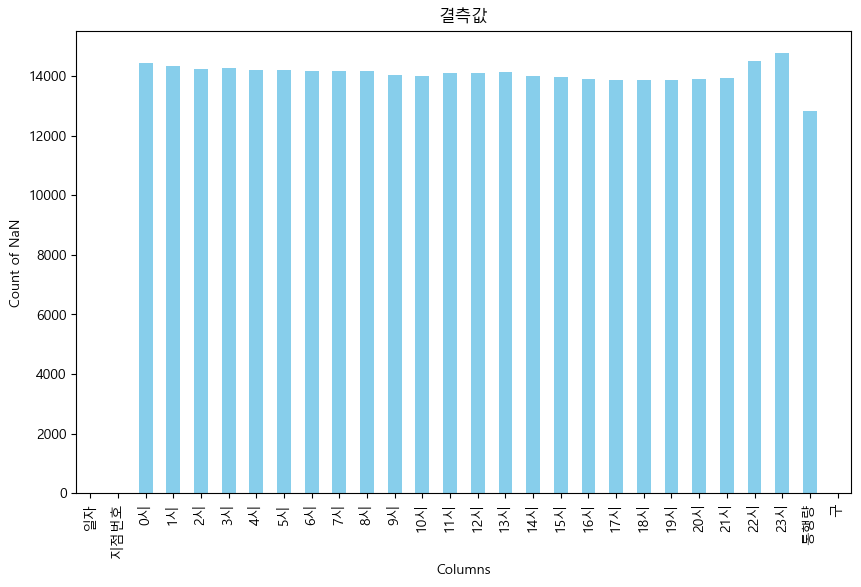

In [34]:
# 결측값 

NaN_values = df_station.isnull().sum()

plt.figure(figsize=(10, 6))
NaN_values.plot(kind='bar', color='skyblue')
plt.title('결측값')
plt.ylabel('Count of NaN')
plt.xlabel('Columns')
plt.show()

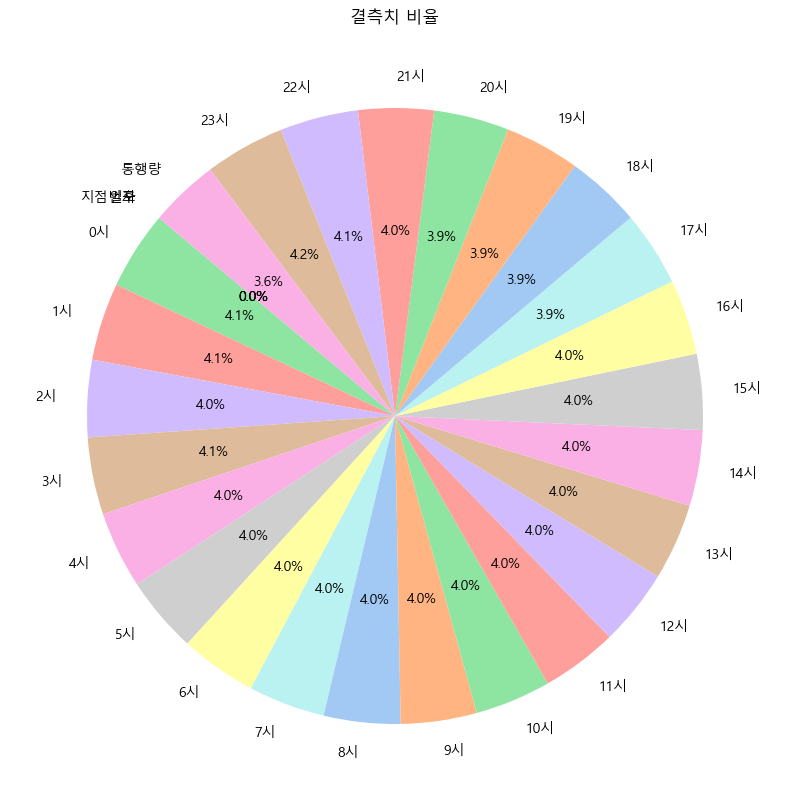

In [35]:
NaN_ratio = df_station.isnull().mean()

plt.figure(figsize=(10, 10))
plt.pie(NaN_ratio, labels=NaN_ratio.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('결측치 비율')
plt.show()

- 교통량이 빈칸으로 표시된 것은 공사, 장애 등으로 유효데이터가 없는 시간대임			
- 2022년 1월부터 <수집 지점 추가 및 변경>이 발생
    - 4개소 추가 : B-38(동부간선 상도지하차도), C-02(월드컵대교), F-09(서부간선지하도로), F-10(신월여의지하도로) 
    - 1개소 변경 : F-09 → D-46(서부간선도로) - 자동차 전용도로 해제로 도시고속에서 간선도로로 변경

In [36]:
df_station.columns

Index(['일자', '지점번호', '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시', '통행량', '구'],
      dtype='object')

### 교통량 최고값, 최소값 확인

In [37]:
# 최고값, 최소값, 평균

select_col = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시', '통행량',]

max_values = df_station[select_col].max()
min_values = df_station[select_col].min()
mean_values = df_station[select_col].mean()

summary = pd.DataFrame({
    'Max':max_values,
    'Min':min_values,
    'Mean':mean_values
})

summary

,Max,Min,Mean
0시,11418.0,1.0,1420.340795
1시,9926.0,1.0,1020.420110
2시,6808.0,1.0,774.321760
3시,6029.0,1.0,661.492474
4시,7004.0,1.0,842.004184
5시,12899.0,8.0,1693.314765
6시,15005.0,7.0,2775.825901
7시,15225.0,6.0,3458.247413
8시,14524.0,8.0,3724.017157
9시,14839.0,6.0,3751.163417


In [38]:
# 최대값/최소값의 idx
max_idx = df_station[select_col].idxmax()
min_idx = df_station[select_col].idxmin()

max_idx['통행량'], min_idx['통행량']

(198718, 194361)

In [39]:
# 해당 행 정보

sorted_idx = [max_idx['통행량'], min_idx['통행량']]
selected_rows = df_station.loc[sorted_idx]
selected_rows

,일자,지점번호,0시,1시,2시,3시,4시,5시,6시,7시,...,16시,17시,18시,19시,20시,21시,22시,23시,통행량,구
198718,20230331,B-36,6587.0,4576.0,3588.0,3352.0,4934.0,11017.0,13859.0,13149.0,...,13631.0,12665.0,12480.0,13144.0,13910.0,13843.0,12637.0,10595.0,273049.0,마포구
194361,20230226,A-19,5.0,2.0,2.0,1.0,2.0,14.0,11.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,중구


2023-02-26일의 A-19지점에서 데이터 결측 값으로 인해 통행량이 제대로 측정되지 않은 것으로 보임

---

### 자치구별 측정소 확인

결측치 처리 방법에서 고민 필요
- 구별 수집 지점이 여러개인 구는 -> 단순 통합이 아닌 평균 값으로 넣어야 하는게 아닌지? 측정소 개수가 많을 수록 통행량이 많이 집계되므로 구별 미세먼지와 연관관계를 분석하는데 오차 커질 것으로 예상  (ex.강남구:10곳, 동대문구:1곳)
- 강북구는 수집 지점이 없어 데이터가 없음(인접구 평균으로 대체)

In [40]:
# 구별 측정소 개수 확인

#col_name = '구'
#gu_count = ['강남구', '강동구', '강서구', '관악구', '광진구', '구로구','금천구', '노원구', '도봉구', '동작구', '동대문구', \
            #'마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

col_filter = '일자'
col_gu = '구'

filter_data = df_station[df_station[col_filter] == 20231201]

gu_cnt = {}

for idx, row in filter_data.iterrows():
    gu_value = row[col_gu]
    gu_cnt[gu_value] = gu_cnt.get(gu_value, 0) + 1

for char, cnt in gu_cnt.items():
    print(f'{char}:{cnt}')

서대문구:4
종로구:10
성북구:5
중구:12
용산구:7
도봉구:2
노원구:6
광진구:2
중랑구:2
강동구:3
서초구:10
송파구:7
강남구:10
금천구:7
구로구:6
강서구:5
양천구:5
은평구:3
마포구:5
영등포구:10
성동구:5
동작구:2
관악구:2
동대문구:1


In [41]:
# 측정소 개수 DataFrame으로 변환
gu_list_df = pd.DataFrame.from_dict(gu_cnt, orient='index', columns=['Value'])
gu_list_df = gu_list_df.reset_index().rename(columns={'index':'key'})

In [42]:
gu_list_df.head()

,key,Value
0,서대문구,4
1,종로구,10
2,성북구,5
3,중구,12
4,용산구,7


### 자치구별 통행량 합산

In [43]:
# 구별 통행량 합산(전체)
df_final = df_station.fillna(0)         # 값을 구하기 위해 NaN 값을 0으로 변경
df_final = df_station.groupby(['일자', '구'], as_index=False).sum()
df_final

,일자,구,지점번호,0시,1시,2시,3시,4시,5시,6시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,통행량
0,20190101,강남구,B-13C-13C-17D-35D-38D-39D-40D-42D-43F-07,0.0,25876.0,17341.0,12897.0,11251.0,11808.0,14001.0,...,41691.0,42229.0,40001.0,35242.0,33658.0,35109.0,32617.0,27057.0,18185.0,652594.0
1,20190101,강동구,B-09B-10C-21,0.0,6160.0,4034.0,3570.0,3266.0,3041.0,3976.0,...,13974.0,13693.0,13327.0,12118.0,11868.0,11375.0,10437.0,7628.0,4807.0,205545.0
2,20190101,강서구,B-26B-32C-01D-20D-21,0.0,9432.0,5438.0,3725.0,3974.0,5421.0,6562.0,...,19762.0,19294.0,17722.0,15541.0,14042.0,13158.0,11560.0,9160.0,6054.0,272395.0
3,20190101,관악구,D-32D-33,0.0,2847.0,2156.0,1533.0,1204.0,1062.0,997.0,...,3033.0,3016.0,2999.0,2734.0,2551.0,2499.0,2466.0,2186.0,1681.0,50987.0
4,20190101,광진구,B-03C-16,0.0,3688.0,2699.0,1878.0,1601.0,1740.0,1946.0,...,5512.0,5843.0,5769.0,5279.0,5152.0,4897.0,4930.0,3918.0,2544.0,91833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,20231231,용산구,A-20A-21A-22C-09C-10D-04F-02,9573.0,6915.0,5686.0,4665.0,4312.0,5335.0,7482.0,...,28746.0,28896.0,27271.0,24304.0,22541.0,23519.0,22855.0,20254.0,14682.0,437702.0
43820,20231231,은평구,B-34B-35D-14,2018.0,1497.0,1182.0,995.0,991.0,1246.0,1778.0,...,7167.0,7044.0,6751.0,6087.0,5322.0,4921.0,4519.0,4188.0,2776.0,100719.0
43821,20231231,종로구,A-02A-03A-05A-06A-07A-08A-14A-15D-01D-02,1900.0,1489.0,1203.0,1086.0,1079.0,1363.0,1984.0,...,6985.0,6828.0,6250.0,5936.0,5360.0,5532.0,5402.0,5062.0,3709.0,105587.0
43822,20231231,중구,A-09A-10A-11A-12A-13A-16A-17A-18A-19A-23A-24D-03,4245.0,3051.0,2424.0,1946.0,1873.0,2661.0,4077.0,...,16343.0,16423.0,15101.0,13455.0,12116.0,11712.0,10987.0,10509.0,8025.0,227115.0


In [44]:
# 컬럼 정리
df_final.drop(['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시',
       '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
       '19시', '20시', '21시', '22시', '23시'], axis=1, inplace=True)

In [45]:
df_final

,일자,구,지점번호,통행량
0,20190101,강남구,B-13C-13C-17D-35D-38D-39D-40D-42D-43F-07,652594.0
1,20190101,강동구,B-09B-10C-21,205545.0
2,20190101,강서구,B-26B-32C-01D-20D-21,272395.0
3,20190101,관악구,D-32D-33,50987.0
4,20190101,광진구,B-03C-16,91833.0
...,...,...,...,...
43819,20231231,용산구,A-20A-21A-22C-09C-10D-04F-02,437702.0
43820,20231231,은평구,B-34B-35D-14,100719.0
43821,20231231,종로구,A-02A-03A-05A-06A-07A-08A-14A-15D-01D-02,105587.0
43822,20231231,중구,A-09A-10A-11A-12A-13A-16A-17A-18A-19A-23A-24D-03,227115.0


In [46]:
# 자치구별 측정소 개수로 통행량 나누기

df_final['일 통행량'] = None

for idx1, row1 in df_final.iterrows():
    for idx2, row2 in gu_list_df.iterrows():
        if row1['구'] == row2['key']:
            result = row1['통행량'] / row2['Value']
            df_final.at[idx1, '일 통행량'] = result

print(df_final)

             일자    구                                              지점번호  \
0      20190101  강남구          B-13C-13C-17D-35D-38D-39D-40D-42D-43F-07   
1      20190101  강동구                                      B-09B-10C-21   
2      20190101  강서구                              B-26B-32C-01D-20D-21   
3      20190101  관악구                                          D-32D-33   
4      20190101  광진구                                          B-03C-16   
...         ...  ...                                               ...   
43819  20231231  용산구                      A-20A-21A-22C-09C-10D-04F-02   
43820  20231231  은평구                                      B-34B-35D-14   
43821  20231231  종로구          A-02A-03A-05A-06A-07A-08A-14A-15D-01D-02   
43822  20231231   중구  A-09A-10A-11A-12A-13A-16A-17A-18A-19A-23A-24D-03   
43823  20231231  중랑구                                          B-05B-07   

            통행량         일 통행량  
0      652594.0       65259.4  
1      205545.0       68515.0  
2      272395.0

In [47]:
df_final

,일자,구,지점번호,통행량,일 통행량
0,20190101,강남구,B-13C-13C-17D-35D-38D-39D-40D-42D-43F-07,652594.0,65259.4
1,20190101,강동구,B-09B-10C-21,205545.0,68515.0
2,20190101,강서구,B-26B-32C-01D-20D-21,272395.0,54479.0
3,20190101,관악구,D-32D-33,50987.0,25493.5
4,20190101,광진구,B-03C-16,91833.0,45916.5
...,...,...,...,...,...
43819,20231231,용산구,A-20A-21A-22C-09C-10D-04F-02,437702.0,62528.857143
43820,20231231,은평구,B-34B-35D-14,100719.0,33573.0
43821,20231231,종로구,A-02A-03A-05A-06A-07A-08A-14A-15D-01D-02,105587.0,10558.7
43822,20231231,중구,A-09A-10A-11A-12A-13A-16A-17A-18A-19A-23A-24D-03,227115.0,18926.25


In [48]:
# 지점번호 콤마 구분
import re
def add_comma(value):
    return re.sub(r'(?<!^)([a-zA-Z])', r',\1', value)

df_final['지점번호'] = df_final['지점번호'].apply(add_comma)

In [49]:
df_final.rename(columns={'통행량' : '전체 통행량'}, inplace=True)

---

### 결측치 채우기

In [50]:
df_final.replace(0, np.nan, inplace=True)

In [51]:
df_final.isnull().sum()

일자        0
구         0
지점번호      0
전체 통행량    8
일 통행량     8
dtype: int64

In [52]:
df_final[df_final.isna().any(axis=1)]

,일자,구,지점번호,전체 통행량,일 통행량
123,20190106,관악구,"D-32,D-33",NaN,NaN
7761,20191120,동대문구,F-05,NaN,NaN
19785,20210404,동대문구,F-05,NaN,NaN
19833,20210406,동대문구,F-05,NaN,NaN
19857,20210407,동대문구,F-05,NaN,NaN
34220,20221126,은평구,"B-34,B-35,D-14",NaN,NaN
34244,20221127,은평구,"B-34,B-35,D-14",NaN,NaN
35300,20230110,은평구,"B-34,B-35,D-14",NaN,NaN


In [53]:
# 결측치 처리

adjacent_districts = {
    '관악구': ['동작구', '서초구', '금천구'],
    '동대문구': ['종로구', '성동구', '광진구', '성북구', '중랑구'],
    '은평구': ['종로구', '서대문구', '마포구', '성북구']
}

for idx, row in df_final.iterrows():
    if pd.isna(row['일 통행량']):
        specific_date = row['일자']
        location = row['구']
        adj_districts = adjacent_districts.get(location, [])

        # 같은 일자와 인접구 정보 filter
        adj_df = df_final[(df_final['일자'] == specific_date) & (df_final['구'].isin(adj_districts))]

        # 일 통행량 평균
        if not adj_df.empty:
            avg_traffic = adj_df['일 통행량'].mean()
            df_final.at[idx, '일 통행량'] = avg_traffic


In [54]:
# 결측치 채워졌는지 확인
index_no = [123, 7761, 19785, 19833, 19857, 34220, 34244, 35300]
rows = df_final.iloc[index_no]
print(rows)

             일자     구            지점번호  전체 통행량         일 통행량
123    20190106   관악구       D-32,D-33     NaN  69711.604762
7761   20191120  동대문구            F-05     NaN  73644.380000
19785  20210404  동대문구            F-05     NaN  57728.500000
19833  20210406  동대문구            F-05     NaN  73294.740000
19857  20210407  동대문구            F-05     NaN  73035.360000
34220  20221126   은평구  B-34,B-35,D-14     NaN  66699.387500
34244  20221127   은평구  B-34,B-35,D-14     NaN  59647.787500
35300  20230110   은평구  B-34,B-35,D-14     NaN  67534.312500


In [55]:
df_final.isnull().sum()

일자        0
구         0
지점번호      0
전체 통행량    8
일 통행량     0
dtype: int64

In [59]:
# 소수점 한자리로 정리
df_final['일 통행량'] = df_final['일 통행량'].round(1)

In [60]:
df_final

,일자,구,지점번호,전체 통행량,일 통행량
0,20190101,강남구,"B-13,C-13,C-17,D-35,D-38,D-39,D-40,D-42,D-43,F-07",652594.0,65259.4
1,20190101,강동구,"B-09,B-10,C-21",205545.0,68515.0
2,20190101,강서구,"B-26,B-32,C-01,D-20,D-21",272395.0,54479.0
3,20190101,관악구,"D-32,D-33",50987.0,25493.5
4,20190101,광진구,"B-03,C-16",91833.0,45916.5
...,...,...,...,...,...
43819,20231231,용산구,"A-20,A-21,A-22,C-09,C-10,D-04,F-02",437702.0,62528.9
43820,20231231,은평구,"B-34,B-35,D-14",100719.0,33573.0
43821,20231231,종로구,"A-02,A-03,A-05,A-06,A-07,A-08,A-14,A-15,D-01,D-02",105587.0,10558.7
43822,20231231,중구,"A-09,A-10,A-11,A-12,A-13,A-16,A-17,A-18,A-19,A...",227115.0,18926.2


In [61]:
df_final.to_excel('2019_2023_교통량_강북구제외.xlsx', index=False)

In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      43824 non-null  int64  
 1   구       43824 non-null  object 
 2   지점번호    43824 non-null  object 
 3   전체 통행량  43816 non-null  float64
 4   일 통행량   43824 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


---

### 결측치(강북구) 추가

In [63]:
df_filled = df_final.copy()

In [64]:
# 인접구 데이터 선별
selected_data = df_filled[df_filled['구'].isin(['성북구', '도봉구', '중랑구'])]

# 일자별 인접구 평균값
avg_traffic = selected_data.groupby('일자')['일 통행량'].mean().reset_index()

# 평균 df에 구 column 추가
avg_traffic['구'] = '강북구'

# 원래 df에 강북구 df 추가
df_filled = pd.concat([df_filled, avg_traffic[['구', '일자', '일 통행량']]], ignore_index=True)

In [65]:
selected_data

,일자,구,지점번호,전체 통행량,일 통행량
8,20190101,도봉구,"B-01,D-11",72492.0,36246.0
15,20190101,성북구,"A-04,D-08,D-09,F-03,F-04",329417.0,65883.4
23,20190101,중랑구,"B-05,B-07",140833.0,70416.5
32,20190102,도봉구,"B-01,D-11",94740.0,47370.0
39,20190102,성북구,"A-04,D-08,D-09,F-03,F-04",387285.0,77457.0
...,...,...,...,...,...
43791,20231230,성북구,"A-04,D-08,D-09,F-03,F-04",157835.0,31567.0
43799,20231230,중랑구,"B-05,B-07",98357.0,49178.5
43808,20231231,도봉구,"B-01,D-11",64571.0,32285.5
43815,20231231,성북구,"A-04,D-08,D-09,F-03,F-04",161903.0,32380.6


In [66]:
avg_traffic

,일자,일 통행량,구
0,20190101,57515.300000,강북구
1,20190102,70489.666667,강북구
2,20190103,73017.166667,강북구
3,20190104,74448.633333,강북구
4,20190105,70741.833333,강북구
...,...,...,...
1821,20231227,54897.733333,강북구
1822,20231228,53369.000000,강북구
1823,20231229,56136.300000,강북구
1824,20231230,37512.833333,강북구


In [67]:
df_filled['구'].unique()

array(['강남구', '강동구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '강북구'], dtype=object)

In [68]:
df_filled = df_filled.sort_values(by=['일자', '구'])
df_filled

,일자,구,지점번호,전체 통행량,일 통행량
0,20190101,강남구,"B-13,C-13,C-17,D-35,D-38,D-39,D-40,D-42,D-43,F-07",652594.0,65259.4
1,20190101,강동구,"B-09,B-10,C-21",205545.0,68515.0
43824,20190101,강북구,NaN,NaN,57515.3
2,20190101,강서구,"B-26,B-32,C-01,D-20,D-21",272395.0,54479.0
3,20190101,관악구,"D-32,D-33",50987.0,25493.5
...,...,...,...,...,...
43819,20231231,용산구,"A-20,A-21,A-22,C-09,C-10,D-04,F-02",437702.0,62528.9
43820,20231231,은평구,"B-34,B-35,D-14",100719.0,33573.0
43821,20231231,종로구,"A-02,A-03,A-05,A-06,A-07,A-08,A-14,A-15,D-01,D-02",105587.0,10558.7
43822,20231231,중구,"A-09,A-10,A-11,A-12,A-13,A-16,A-17,A-18,A-19,A...",227115.0,18926.2


In [69]:
df_filled = df_filled.reset_index(drop=True)

In [70]:
df_filled = df_filled.fillna('-') 

---

### (최종) 서울시 일별 통행량 최고값, 최소값, 평균 data 확인

In [71]:
# 최고값, 최소값, 평균

select_filled = ['일 통행량']

max = df_filled[select_filled].max()
min = df_filled[select_filled].min()
mean = df_filled[select_filled].mean()

summary_final = pd.DataFrame({
    'Max':max,
    'Min':min,
    'Mean':mean
})

summary_final

,Max,Min,Mean
일 통행량,171464.5,604.7,68586.353271


In [72]:
# 최대값/최소값의 idx
max_idx_final = df_filled[select_filled].idxmax()
min_idx_final = df_filled[select_filled].idxmin()

max_idx_final['일 통행량'], min_idx_final['일 통행량']

(8836, 36746)

In [73]:
# 해당 행 정보

sorted_idx_final = [max_idx_final['일 통행량'], min_idx_final['일 통행량']]
selected_rows_final = df_filled.loc[sorted_idx_final]
selected_rows_final

,일자,구,지점번호,전체 통행량,일 통행량
8836,20191220,동작구,"D-30,F-01",342929.0,171464.5
36746,20230109,은평구,"B-34,B-35,D-14",1814.0,604.7


In [74]:
df_filled.replace(0, np.nan, inplace=True)

In [75]:
df_filled.isnull().sum()

일자        0
구         0
지점번호      0
전체 통행량    0
일 통행량     0
dtype: int64

In [76]:
df_end = df_filled
df_end.to_excel('2019_2023_서울시교통량_결측값처리.xlsx', index=False)

In [77]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45650 entries, 0 to 45649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      45650 non-null  int64  
 1   구       45650 non-null  object 
 2   지점번호    45650 non-null  object 
 3   전체 통행량  45650 non-null  object 
 4   일 통행량   45650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


---